In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix, mean_squared_error, r2_score
#print(pd.__version__)

In [2]:
#READ CSV AND DISPLAY FEW ROWS OF DATA
companydata = pd.read_csv("companies.csv")
companydata.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k


In [3]:
companydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly_rated_for      9908 non-null   object 
 4   Critically_rated_for  2807 non-null   object 
 5   Total_reviews         10000 non-null  object 
 6   Avg_salary            10000 non-null  object 
 7   Interviews_taken      10000 non-null  object 
 8   Total_jobs_available  10000 non-null  object 
 9   Total_benefits        10000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 781.4+ KB


In [4]:
for column in companydata.columns:
    companydata.rename(columns={column: column.replace('_',' ')}, inplace= True)

In [5]:
companydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly rated for      9908 non-null   object 
 4   Critically rated for  2807 non-null   object 
 5   Total reviews         10000 non-null  object 
 6   Avg salary            10000 non-null  object 
 7   Interviews taken      10000 non-null  object 
 8   Total jobs available  10000 non-null  object 
 9   Total benefits        10000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 781.4+ KB


In [6]:
#CHECK FOR NULL VALUES - 'CRITICALLY RATED FOR'
companydata['Critically rated for'].isnull()

0       False
1        True
2       False
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Name: Critically rated for, Length: 10000, dtype: bool

In [7]:
#FILL NULL VALUES - 'CRITICALLY RATED FOR'
companydata['Critically rated for'].fillna('Not Applicable',inplace=True)

In [8]:
companydata.tail(3)

,Company name,Description,Ratings,Highly rated for,Critically rated for,Total reviews,Avg salary,Interviews taken,Total jobs available,Total benefits
9997,Avians Innovations Technology,Building Material | 51-200 Employees | 17 year...,3.7,"Promotions / Appraisal, Work Satisfaction, Sal...",Not Applicable,72,489,3,11,8
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",Not Applicable,72,520,4,1,10
9999,Beroe Inc,Management Consulting | 201-500 Employees | 19...,4.5,"Work Life Balance, Job Security, Company Culture",Not Applicable,72,585,7,5,14


In [9]:
#CHECK FOR NULL VALUES - 'HIGHLY RATED FOR'
companydata['Highly rated for'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Highly rated for, Length: 10000, dtype: bool

In [10]:
#FILL NULL VALUES - 'HIGHLY RATED FOR'
companydata['Highly rated for'].fillna('Not Applicable',inplace=True)

In [11]:
companydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly rated for      10000 non-null  object 
 4   Critically rated for  10000 non-null  object 
 5   Total reviews         10000 non-null  object 
 6   Avg salary            10000 non-null  object 
 7   Interviews taken      10000 non-null  object 
 8   Total jobs available  10000 non-null  object 
 9   Total benefits        10000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 781.4+ KB


In [12]:
# VERIFICATION
verify = (companydata['Company name'] == 'Jana Small Finance Bank') & (companydata['Ratings']==3.9)

In [13]:
companydata[verify]

,Company name,Description,Ratings,Highly rated for,Critically rated for,Total reviews,Avg salary,Interviews taken,Total jobs available,Total benefits
61,Jana Small Finance Bank,Banking | 10k-50k Employees | Public | 18 year...,3.9,Not Applicable,Not Applicable,5.6k,15.3k,178,72,620


In [14]:
verify1 = (companydata['Highly rated for'] == 'Job Security') & (companydata['Critically rated for']=='Salary & Benefits')

In [15]:
companydata[verify1].head()

,Company name,Description,Ratings,Highly rated for,Critically rated for,Total reviews,Avg salary,Interviews taken,Total jobs available,Total benefits
3472,Country Inns & Suites,Hospitality | 11-50 Employees | 39 years old |...,3.9,Job Security,Salary & Benefits,216,811,4,3,36
8644,Rishi Laser,201-500 Employees | Public | 32 years old | Mu...,3.9,Job Security,Salary & Benefits,84,381,5,--,11


In [16]:
companydata[['Highly rated H1','Highly rated H2','Highly rated H3']] = companydata['Highly rated for'].str.split(',',expand=True)
companydata['Highly rated H2'].fillna('Not Applicable',inplace=True)
companydata['Highly rated H3'].fillna('Not Applicable',inplace=True)

In [17]:
companydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly rated for      10000 non-null  object 
 4   Critically rated for  10000 non-null  object 
 5   Total reviews         10000 non-null  object 
 6   Avg salary            10000 non-null  object 
 7   Interviews taken      10000 non-null  object 
 8   Total jobs available  10000 non-null  object 
 9   Total benefits        10000 non-null  object 
 10  Highly rated H1       10000 non-null  object 
 11  Highly rated H2       10000 non-null  object 
 12  Highly rated H3       10000 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1015.8+ KB


In [18]:
verify2 = (companydata['Highly rated H1'] == 'Job Security') | (companydata['Highly rated H2'] == 'Job Security') | (companydata['Highly rated H3'] == 'Job Security'  ) & (companydata['Critically rated for']== 'Salary & Benefits')

In [19]:
companydata[verify2].head(2)

,Company name,Description,Ratings,Highly rated for,Critically rated for,Total reviews,Avg salary,Interviews taken,Total jobs available,Total benefits,Highly rated H1,Highly rated H2,Highly rated H3
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k,Job Security,Work Life Balance,Not Applicable
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k,Job Security,Not Applicable,Not Applicable


In [20]:
companydata[['Critically rated C1','Critically rated C2','Critically rated C3']] =companydata['Critically rated for'].str.split(',',expand=True)
companydata['Critically rated C2'].fillna('Not Applicable',inplace=True)
companydata['Critically rated C3'].fillna('Not Applicable',inplace=True)

In [21]:
companydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly rated for      10000 non-null  object 
 4   Critically rated for  10000 non-null  object 
 5   Total reviews         10000 non-null  object 
 6   Avg salary            10000 non-null  object 
 7   Interviews taken      10000 non-null  object 
 8   Total jobs available  10000 non-null  object 
 9   Total benefits        10000 non-null  object 
 10  Highly rated H1       10000 non-null  object 
 11  Highly rated H2       10000 non-null  object 
 12  Highly rated H3       10000 non-null  object 
 13  Critically rated C1   10000 non-null  object 
 14  Critically rated C2   10000 non-null  object 
 15  Critically rated C3 

In [22]:
verify3 = (companydata['Highly rated H1'] == 'Job Security') | (companydata['Highly rated H2'] == 'Job Security') | (companydata['Highly rated H3'] == 'Job Security'  ) & (companydata['Critically rated C1']== 'Promotions / Appraisal') | (companydata['Critically rated C2']== 'Promotions / Appraisal') | (companydata['Critically rated C3']== 'Promotions / Appraisal')

In [23]:
companydata[verify3].head(2)

,Company name,Description,Ratings,Highly rated for,Critically rated for,Total reviews,Avg salary,Interviews taken,Total jobs available,Total benefits,Highly rated H1,Highly rated H2,Highly rated H3,Critically rated C1,Critically rated C2,Critically rated C3
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k,Job Security,Work Life Balance,Not Applicable,Promotions / Appraisal,Salary & Benefits,Not Applicable
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k,Job Security,Not Applicable,Not Applicable,Promotions / Appraisal,Salary & Benefits,Not Applicable


In [24]:
companydata.describe()

,Ratings
count,10000.000000
mean,3.894710
std,0.385894
min,1.300000
25%,3.700000
50%,3.900000
75%,4.100000
max,5.000000


In [25]:
companydata['Ratings'].mean()

3.89471

In [26]:
companydata['Ratings'].max()

5.0

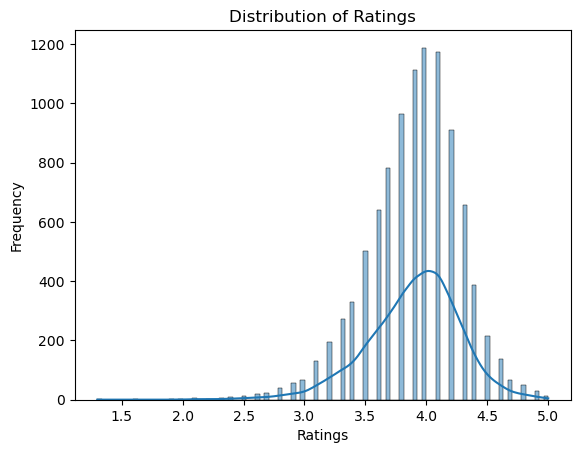

In [27]:
# HISTOGRAM FOR DISTRIBUTION OF RATINGS
sns.histplot(data=companydata, x='Ratings', kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [28]:
#HIGHLY RATED 10 CATEGORIES CHART 

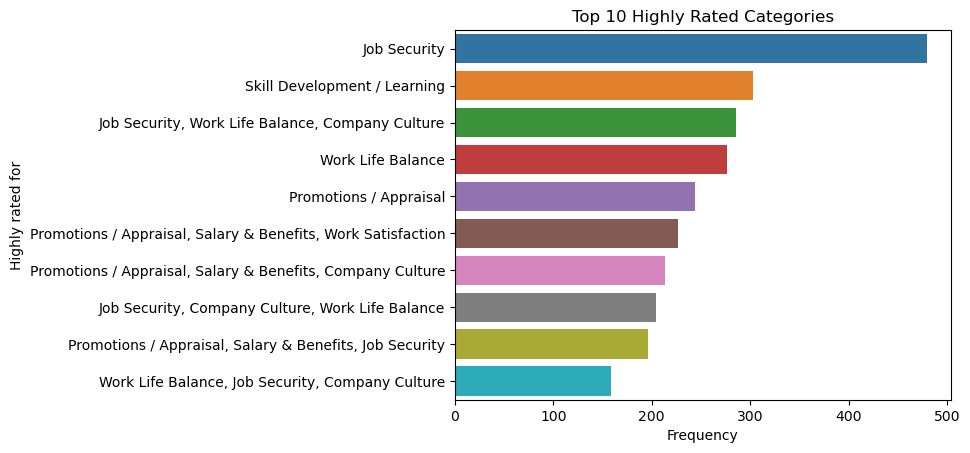

<Figure size 1000x800 with 0 Axes>

In [29]:
category_counts = companydata['Highly rated for'].value_counts().nlargest(10)
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Highly Rated Categories')
plt.xlabel('Frequency')
plt.ylabel('Highly rated for')
plt.figure(figsize=(10, 8))
plt.show()

In [30]:
#CRITICALLY RATED 10 CATEGORIES CHART 

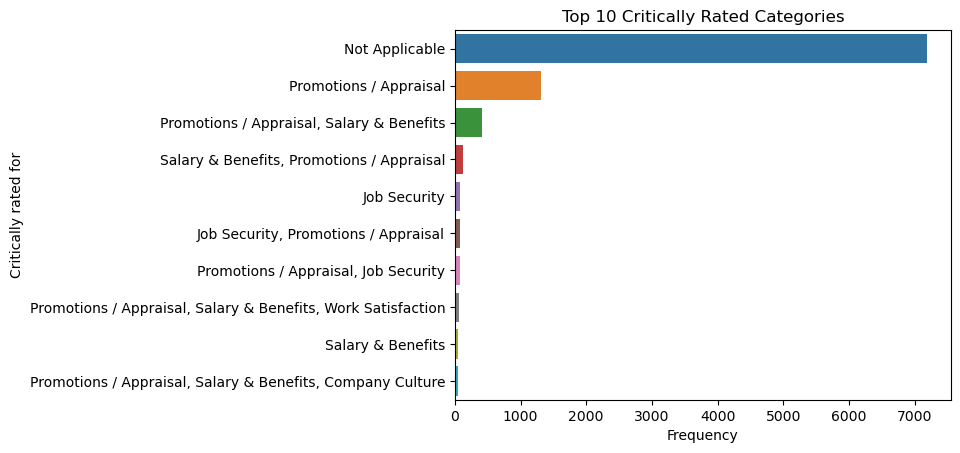

<Figure size 1000x800 with 0 Axes>

In [31]:
category_counts = companydata['Critically rated for'].value_counts().nlargest(10)
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Critically Rated Categories')
plt.xlabel('Frequency')
plt.ylabel('Critically rated for')
plt.figure(figsize=(10, 8))
plt.show()

In [32]:
# SALARY BOX PLOTTING
def convert_k_salary(salary):
    if isinstance(salary, str):
        if salary.lower().endswith('k'):
            return float(salary[:-1]) * 1000
        else:
            try:
                return float(salary)
            except ValueError:
                return np.nan
    else:
        return salary

companydata['Avg salary'] = companydata['Avg salary'].apply(convert_k_salary)

In [33]:
print(companydata.sample(5))

                    Company name  \
7633  Lithium Urban Technologies   
6570               MRC Logistics   
6732                         DSM   
5861      BlazeClan Technologies   
7330              Delux Bearings   

                                            Description  Ratings  \
7633  Urban Transport | 51-200 Employees | Startup |...      3.5   
6570  Logistics | 1k-5k Employees | 53 years old | P...      4.0   
6732  Chemicals | 1k-5k Employees | Forbes Global 20...      4.5   
5861  IT Services & Consulting | 501-1k Employees | ...      3.8   
7330  Auto Components | 501-1k Employees | 68 years ...      4.2   

                                       Highly rated for Critically rated for  \
7633  Promotions / Appraisal, Work Satisfaction, Com...       Not Applicable   
6570  Salary & Benefits, Company Culture, Work Satis...       Not Applicable   
6732  Company Culture, Work Life Balance, Work Satis...       Not Applicable   
5861  Skill Development / Learning, Company Culture,..

In [34]:
companydata['Avg salary'].mean()

2382.855271054211

In [35]:
companydata['Avg salary'].max()

856900.0

<Axes: xlabel='Avg salary'>

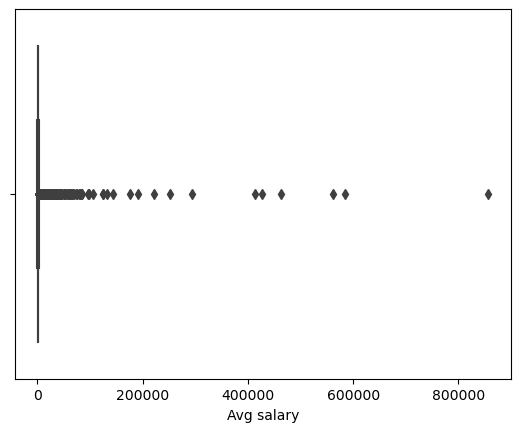

In [36]:
sns.boxplot(x=companydata['Avg salary'])

In [37]:
# TOTAL REVIEWS VS TOTAL BENEFITS

In [38]:
def convert_review(review):
    if isinstance(review, str):
        if review.lower().endswith('k'):
            return float(review[:-1]) * 1000
        else:
            try:
                return float(review)
            except ValueError:
                return np.nan
    else:
        return review

companydata['Total reviews'] = companydata['Total reviews'].apply(convert_review)

In [39]:
companydata['Total reviews'].mean()

415.0845

In [40]:
companydata['Total reviews'].max()

73100.0

In [41]:
def convert_benefits(benefits):
    if isinstance(benefits, str):
        if benefits.lower().endswith('k'):
            return float(benefits[:-1]) * 1000
        else:
            try:
                return float(benefits)
            except ValueError:
                return np.nan
    else:
        return benefits

companydata['Total benefits'] = companydata['Total benefits'].apply(convert_benefits)

In [42]:
companydata['Total benefits'].mean()

53.98246144541881

In [43]:
companydata['Total benefits'].max()

11500.0

<Axes: xlabel='Total reviews', ylabel='Total benefits'>

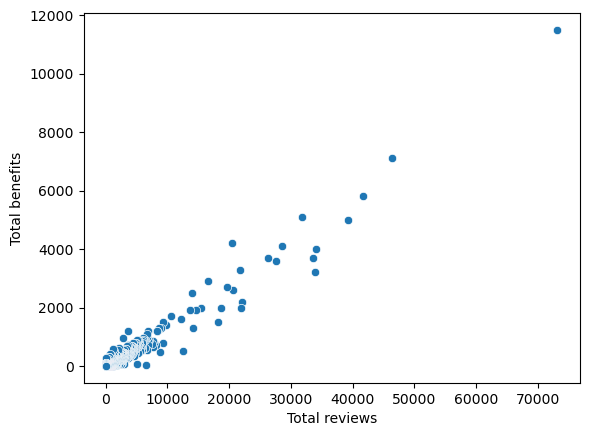

In [44]:
sns.scatterplot(x='Total reviews', y='Total benefits', data=companydata)

In [45]:
#INTERVIEW TAKEN VS JOB AVAILABLE

In [46]:
def convert_interviews(interview):
    if isinstance(interview, str):
        if interview.lower().endswith('k'):
            return float(interview[:-1]) * 1000
        else:
            try:
                return float(interview)
            except ValueError:
                return np.nan
    else:
        return interview

companydata['Interviews taken'] = companydata['Interviews taken'].apply(convert_interviews)

In [47]:
companydata['Interviews taken'].mean()

25.612207340762705

In [48]:
companydata['Interviews taken'].max()

6100.0

In [49]:
def convert_job(job):
    if isinstance(job, str):
        if job.lower().endswith('k'):
            return float(job[:-1]) * 1000
        else:
            try:
                return float(job)
            except ValueError:
                return np.nan
    else:
        return job

companydata['Total jobs available'] = companydata['Total jobs available'].apply(convert_job)

In [50]:
companydata['Total jobs available'].mean()

34.22790850748725

In [51]:
companydata['Total jobs available'].max()

9900.0

<Axes: xlabel='Interviews taken', ylabel='Total jobs available'>

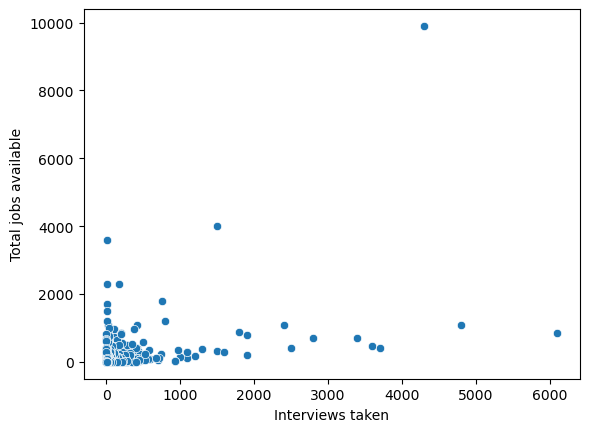

In [52]:
sns.scatterplot(x='Interviews taken', y='Total jobs available', data=companydata)

In [53]:
companydata['Description'].value_counts()

Bangalore / Bengaluru +3 more                                                           4
Bangalore / Bengaluru +2 more                                                           3
IT Services & Consulting | 51-200 Employees | 16 years old | Noida +4 more              3
IT Services & Consulting | 501-1k Employees | 24 years old | Chennai +1 more            3
IT Services & Consulting | 501-1k Employees | 14 years old | Pune +3 more               3
                                                                                       ..
Healthcare | 1k-5k Employees | 128 years old | Erlangen +20 more                        1
Real Estate | 501-1k Employees | Public | 38 years old | Pune +16 more                  1
Financial Services | 11-50 Employees | 15 years old | Mumbai +18 more                   1
IT Services & Consulting | 501-1k Employees | Public | 28 years old | Noida +41 more    1
Management Consulting | 201-500 Employees | 19 years old | Chennai +3 more              1
Name: Desc

In [54]:
 companydata['Promotion_Appraisal_Focused']  = (companydata['Highly rated for'] == 'Promotions / Appraisal') | (companydata['Critically rated for'] == 'Promotions / Appraisal')

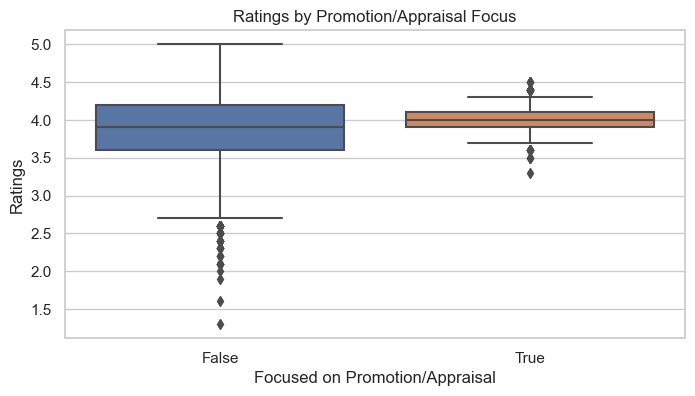

In [55]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.boxplot(x='Promotion_Appraisal_Focused', y='Ratings', data=companydata)
plt.title('Ratings by Promotion/Appraisal Focus')
plt.xlabel('Focused on Promotion/Appraisal')
plt.ylabel('Ratings')
plt.show()

In [56]:
companydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company name                 10000 non-null  object 
 1   Description                  10000 non-null  object 
 2   Ratings                      10000 non-null  float64
 3   Highly rated for             10000 non-null  object 
 4   Critically rated for         10000 non-null  object 
 5   Total reviews                10000 non-null  float64
 6   Avg salary                   9998 non-null   float64
 7   Interviews taken             9781 non-null   float64
 8   Total jobs available         6077 non-null   float64
 9   Total benefits               9921 non-null   float64
 10  Highly rated H1              10000 non-null  object 
 11  Highly rated H2              10000 non-null  object 
 12  Highly rated H3              10000 non-null  object 
 13  Critically rated 

In [57]:
#FILL NULL VALUES
companydata['Avg salary'].fillna('0',inplace=True)
companydata['Interviews taken'].fillna('0',inplace=True)
companydata['Total jobs available'].fillna('0',inplace=True)
companydata['Total benefits'].fillna('0',inplace=True)

In [58]:
companydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company name                 10000 non-null  object 
 1   Description                  10000 non-null  object 
 2   Ratings                      10000 non-null  float64
 3   Highly rated for             10000 non-null  object 
 4   Critically rated for         10000 non-null  object 
 5   Total reviews                10000 non-null  float64
 6   Avg salary                   10000 non-null  object 
 7   Interviews taken             10000 non-null  object 
 8   Total jobs available         10000 non-null  object 
 9   Total benefits               10000 non-null  object 
 10  Highly rated H1              10000 non-null  object 
 11  Highly rated H2              10000 non-null  object 
 12  Highly rated H3              10000 non-null  object 
 13  Critically rated 

TASK 1: PART A -- EMPLOYEE'S PROMOTION PREDICTOR

In [59]:
def promotion_rating(row):
    if 'Promotions / Appraisal' in row['Highly rated for']:
        return 1
    elif 'Promotions / Appraisal' in row['Critically rated for']:
        return 0
    else:
        return 0 
        
companydata['promotion_target'] = companydata.apply(promotion_rating, axis=1)

In [60]:
#TRAIN TEST SPLIT
X = companydata[['Ratings', 'Total benefits']]
y = companydata['promotion_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
#SIMPLE IMPUTER
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#LOGISTIC REGRESSION
logreg = LogisticRegression()
logreg.fit(X_train_imputed, y_train)
y_pred = logreg.predict(X_test_imputed)

In [62]:
#CONFUSION MATRIX
co_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix: {co_matrix}")
#ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#F1 SCORE
f1 = f1_score(y_test,y_pred)
print(f"f1 score: {f1}")
#PRECISION
p_score = precision_score(y_test, y_pred)
print(f"precision score: {p_score}")
#RECALL
r_score = recall_score(y_test, y_pred)
print(f"recall score: {r_score}")

Confusion matrix: [[1245  107]
 [ 278  370]]
Accuracy: 0.8075
f1 score: 0.6577777777777777
precision score: 0.7756813417190775
recall score: 0.5709876543209876


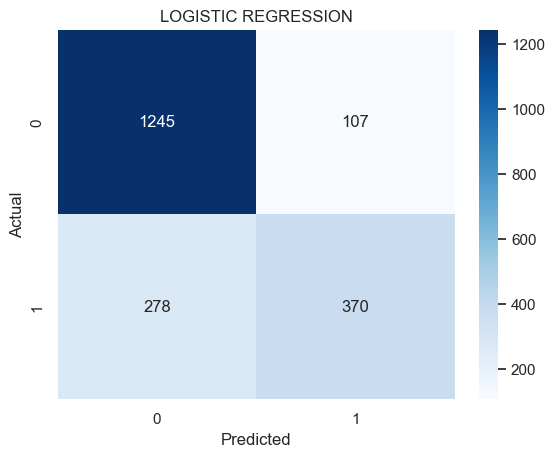

In [65]:
sns.heatmap(co_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('LOGISTIC REGRESSION')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
#DECISION TREES
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [67]:
#CONFUSION MATRIX
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"DT Confusion Matrix:\n{conf_matrix}")
#ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#F1 SCORE
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")
#PRECISION
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
#RECALL
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

DT Confusion Matrix:
[[1188  164]
 [ 225  423]]
Accuracy: 0.8055
F1 Score: 0.6850202429149798
Precision: 0.7206132879045997
Recall: 0.6527777777777778


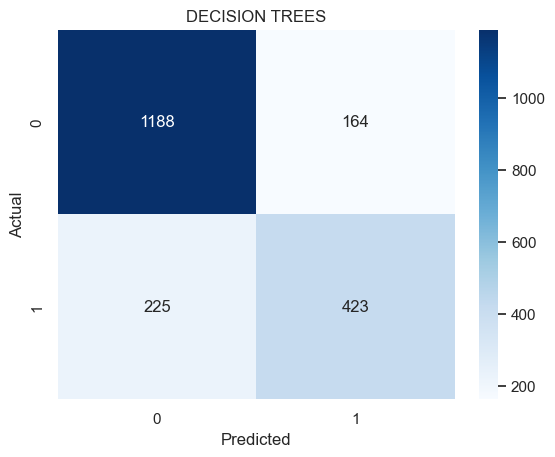

In [69]:
#DECISION TREES CONFUSION MATRIX
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('DECISION TREES')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
#SUPPORT VECTOR MACHINE
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [71]:
#CONFUSION MATRIX
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(f"SVM Confusion Matrix:\n{conf_matrix_svm}")
#ACCURACY
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
#F1 SCORE
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM F1 Score: {f1_svm}")
#PRECISION
precision_svm = precision_score(y_test, y_pred_svm)
print(f"SVM Precision: {precision_svm}")
#RECALL
recall_svm = recall_score(y_test, y_pred_svm)
print(f"SVM Recall: {recall_svm}")

SVM Confusion Matrix:
[[1352    0]
 [ 648    0]]
SVM Accuracy: 0.676
SVM F1 Score: 0.0
SVM Precision: 0.0
SVM Recall: 0.0


C:\Users\DELL\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


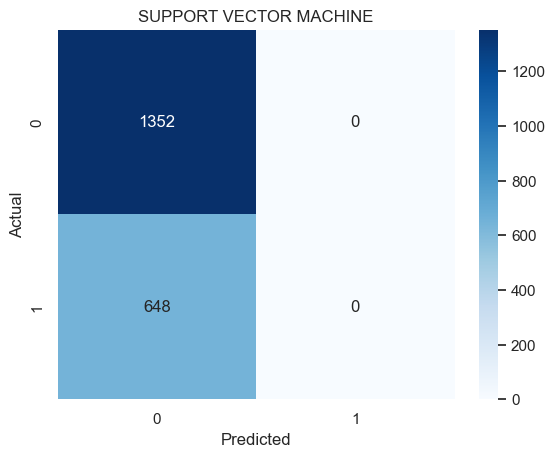

In [72]:
#SUPPORT VECTOR MACHINE CONFUSION MATRIX
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')  # cmap='Blues' is optional for color
plt.title('SUPPORT VECTOR MACHINE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TASK 1: PART B -- EMPLOYEE'S RETENTION PREDICTOR

In [73]:
def retention(row):
    if 'Job Security' in row['Highly rated for'] and 'Salary & Benefits' in row['Highly rated for']:
        return 1
    elif 'Job Security' in row['Critically rated for'] and 'Salary & Benefits' in row['Critically rated for']:
        return 0
    else:
        return 0 
        
companydata['retention_target'] = companydata.apply(retention, axis=1)

In [74]:
# TRAIN-TEST SPLIT CONCEPT
features = ['Ratings', 'Total jobs available']
target = 'retention_target'
companydata[features] = companydata[features].astype(float)
companydata[target] = companydata[target].astype(int)
train_data, test_data, train_labels, test_labels = train_test_split(companydata[features], companydata[target], test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_data, train_labels)
rf_predictions = rf_model.predict(test_data)

In [75]:
# TRAIN-TEST SPLIT
features = ['Ratings', 'Total jobs available']
target = 'retention_target'
train_data, test_data, train_labels, test_labels = train_test_split(companydata[features], companydata[target], test_size=0.2, random_state=42)

In [76]:
#RANDOM FOREST
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_data, train_labels)
rf_predictions = rf_model.predict(test_data)

In [77]:
print("Random Forest:")
print(classification_report(test_labels, rf_predictions))

Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1802
           1       0.18      0.02      0.04       198

    accuracy                           0.89      2000
   macro avg       0.54      0.51      0.49      2000
weighted avg       0.83      0.89      0.85      2000



In [78]:
#CONFUSION MATRIX
con_matrix=confusion_matrix(test_labels, rf_predictions)
print(con_matrix)
#ACCURACY
acc_rf = accuracy_score(test_labels, rf_predictions)
print("Accuracy:",acc_rf)

[[1784   18]
 [ 194    4]]
Accuracy: 0.894


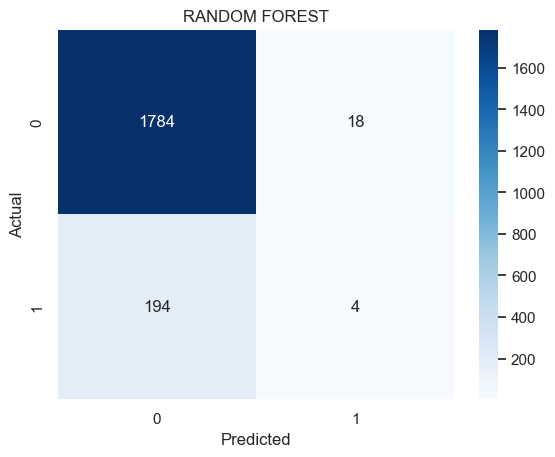

In [79]:
#RANDOM FOREST CONFUSION MATRIX
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('RANDOM FOREST')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
#GRADIENT BOOSTING
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(train_data, train_labels)
gb_predictions = gb_model.predict(test_data)

In [81]:
print("\nGradient Boosting:")
print(classification_report(test_labels, gb_predictions))


Gradient Boosting:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1802
           1       0.67      0.01      0.02       198

    accuracy                           0.90      2000
   macro avg       0.78      0.50      0.48      2000
weighted avg       0.88      0.90      0.86      2000



In [82]:
#CONFUSION MATRIX
c_matrix=confusion_matrix(test_labels, gb_predictions)
print(c_matrix)
#ACCURACY
acc_gb = accuracy_score(test_labels, gb_predictions)
print("Accuracy:",acc_gb)

[[1801    1]
 [ 196    2]]
Accuracy: 0.9015


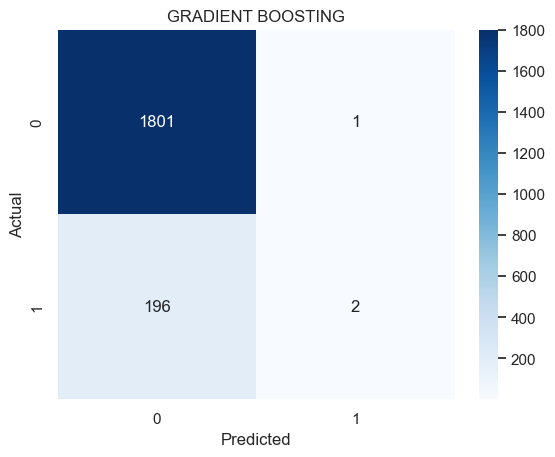

In [83]:
#GRADIENT BOOSTING CONFUSION MATRIX
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('GRADIENT BOOSTING')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
#SUPPORT VECTOR MACHINE
svm = SVC()
svm.fit(train_data, train_labels)
svm_predictions = svm.predict(test_data)

In [85]:
print("\nSupport Vector Machines (SVM):")
print(classification_report(test_labels, svm_predictions))


Support Vector Machines (SVM):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1802
           1       0.00      0.00      0.00       198

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000



C:\Users\DELL\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
#CONFUSION MATRIX
conn_matrix=confusion_matrix(test_labels, svm_predictions)
print(conn_matrix)
#ACCURACY
acc_svm = accuracy_score(test_labels, svm_predictions)
print("Accuracy:",acc_svm)

[[1802    0]
 [ 198    0]]
Accuracy: 0.901


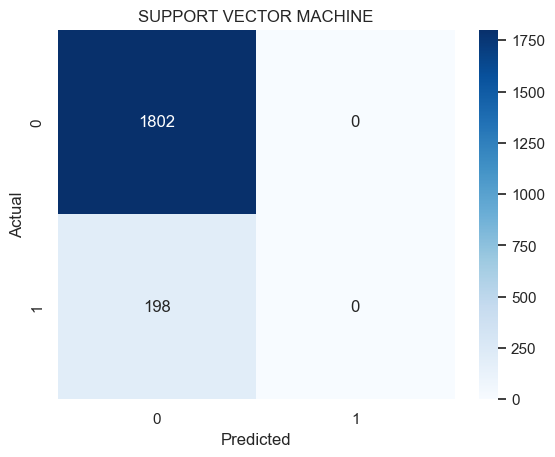

In [87]:
#SUPPORT VECTOR MACHINE CONFUSION MATRIX
sns.heatmap(conn_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('SUPPORT VECTOR MACHINE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TASK 2 -- PREDICTIVE MODELLING FOR JOB SATISFACTION

In [89]:
# Encode categorical features using Label Encoding
label_encoder = LabelEncoder()
companydata['Job_Satisfaction'] = (companydata['Highly rated H1'] == 'Work Satisfaction') | (companydata['Highly rated H2'] == 'Work Satisfaction') | (companydata['Highly rated H3'] == 'Work Satisfaction')
companydata['Job_Satisfaction'] = label_encoder.fit_transform(companydata['Job_Satisfaction'])

In [90]:
features = ['Ratings', 'Total reviews', 'Avg salary', 'Interviews taken', 'Total jobs available']
target = 'Job_Satisfaction' 
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
companydata[features] = imputer.fit_transform(companydata[features])
X = companydata[features]
y = companydata[target]

In [91]:
# Standardize numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [93]:
#Random Forest Model
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)
rfr_predictions = rfr_model.predict(X_test)

In [94]:
#EVALUATION METRICS
#MEAN SQUARED ERROR
mse = mean_squared_error(y_test, rfr_predictions)
print("Mean Squared Error (MSE):", mse)
#R2 SCORE
r2 = r2_score(y_test, rfr_predictions)
print("R Squared (R2):", r2)


Mean Squared Error (MSE): 0.018407
R Squared (R2): -0.013726921011689264


In [95]:
#XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

In [96]:
#EVALUATION METRICS
#MEAN SQUARED ERROR
mse = mean_squared_error(y_test, xgb_predictions)
print("Mean Squared Error (MSE):", mse)
#R2 SCORE
r2 = r2_score(y_test, xgb_predictions)
print("R Squared (R2):", r2)

Mean Squared Error (MSE): 0.020704185313664327
R Squared (R2): -0.14023958440138928
